> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have selected the dataset from "The Movie Database" aka "TMDb".This data set contains information about movies collected from The Movie Database (TMDb) from 1960 t0 2015, including user ratings,budget and revenue.
>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. Hereafter in this report, these two columns will be called as "Adjusted Budget" and "Adjusted Revenue".

> The questions that I plan to explore are the following:

> 1. Which movie generated the highest all time revenue? ( based on revenue of the associated movie in terms of 2010 dollars)

> 1. Which movie was produced with the highest budget? ( based on revenue of the associated movie in terms of 2010 dollars adjusted for inflation)

> 1. Which movie has got the highest vote count?

> 4. What is the correlation between popularity & adjusted budget?

> 5. What is the correlation between adjusted budget and adjusted revenue? 

> 6. What is the correlation between runtime & popularity? 

> 7. Is there a correlation between release year and adjusted budget?

> For my analysis, I will be using 2 methods of finding correaltion, one will be using pandas and other together with pearson correlation via Scipy.Stats. I intend to use scatterplots as it gives a good visual picture of the relationship between the two variables, and aids the interpretation of the correlation coefficient.
> Notably, the investigations conducted here are exploratory and any associations will be tentative at best, as only visualization and basic correlations are attempted.

In [301]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats                  # for pearson correlation
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean TMdB dataset for analysis. 

### General Properties

In [302]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> As seen above, we notice the following properties of the dataset.

> 1.There are total 10866 Rows & 21 Columns.

> 2.Null values are present in below variables:
<ul>
<li>imdb_id</li>
<li>cast</li>
<li>homepage</li>
<li>director</li>
<li>tagline</li>
<li>keywords</li>
<li>overview</li>
<li>genres</li>
<li>production companies</li>    
</ul>

> 3.If we consider IMDB_ID to be unique then there are actually 10856 rows to be considered.

In [303]:
#Head function with no arguments gets the first five rows of data from the data frame so the output will be
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Cleaning

### Step 1 : Check for duplicates

In [304]:
sum(tmdb_df.duplicated())

1

> From the above, we notice that there is 1 duplicate. Let us remove this duplicacy.

In [305]:
tmdb_df.drop_duplicates(inplace=True)

### Step 2 : Remove null values in imdb_id column

In [306]:
# Here, we are removing rows with null values in imdb_id column
tmdb_df.dropna(subset=['imdb_id'], inplace=True)  
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

> According to the the set of aforementioned questions that I plan to explore, I would need only the following variables.
> Subsequently, I decide to create a subset of the TMDB dataset i.e. sub_tmdb_df having selected columns.
<ul>
<li>popularity</li>
<li>original_title</li>
<li>runtime</li>
<li>vote_average</li>
<li>release_year</li>
<li>budget_adj</li>
<li>revenue_adj</li>
</ul>

### Step 3 : Derive a subset of data with selected columns

In [307]:
# Derive a subset of data with selected columns
sub_tmdb_df = tmdb_df[["popularity","original_title","runtime","vote_average","release_year", "budget_adj","revenue_adj"]]
sub_tmdb_df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10855.000000,10855.000000,10855.000000,10855.000000,1.085500e+04,1.085500e+04
mean,0.646832,102.105205,5.973865,2001.313128,1.756606e+07,5.141632e+07
std,1.000591,31.348734,0.934604,12.815672,3.431919e+07,1.446965e+08
min,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207733,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383998,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.714446,111.000000,6.600000,2011.000000,2.085325e+07,3.374346e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which movie generated the highest all time revenue? ( based on revenue of the associated movie in terms of 2010 dollars adjusted for inflation)

In [308]:
sub_tmdb_df.loc[sub_tmdb_df['revenue_adj'].idxmax()]

popularity            9.43277
original_title         Avatar
runtime                   162
vote_average              7.1
release_year             2009
budget_adj        2.40887e+08
revenue_adj       2.82712e+09
Name: 1386, dtype: object

Avatar is the movie with highest revenue based on adjusted revenues

### Research Question 2 : Which movie was produced with the highest budget? ( based on revenue of the associated movie in terms of 2010 dollars adjusted for inflation)

In [309]:
sub_tmdb_df.loc[sub_tmdb_df['budget_adj'].idxmax()]

popularity                  0.25054
original_title    The Warrior's Way
runtime                         100
vote_average                    6.4
release_year                   2010
budget_adj                 4.25e+08
revenue_adj             1.10876e+07
Name: 2244, dtype: object

Movie titled "The Warrior's Way" is produced with highest adjusted budget

### Research Question 3 : Which movie was has got the highest vote counts?

In [310]:
tmdb_df.loc[tmdb_df['vote_count'].idxmax()]

id                                                                  27205
imdb_id                                                         tt1375666
popularity                                                        9.36364
budget                                                          160000000
revenue                                                         825500000
original_title                                                  Inception
cast                    Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...
homepage                            http://inceptionmovie.warnerbros.com/
director                                                Christopher Nolan
tagline                              Your mind is the scene of the crime.
keywords                 loss of lover|dream|sleep|subconsciousness|heist
overview                Cobb, a skilled thief who commits corporate es...
runtime                                                               148
genres                  Action|Thrille

Movie titled "Inception" got highest votes

### Research Question 4 (What is the correlation between popularity & adjusted budget?)

#### Step 1 : Pearson correlation using scipy.stats

In [311]:
# Pearson correlation
print ('association between popularity and budget_adj')
print (scipy.stats.pearsonr(sub_tmdb_df['budget_adj'], tmdb_df['popularity']))

association between popularity and budget_adj
(0.5134703421904756, 0.0)


#### Step 2 : Correlation using Pandas

In [312]:
# Panda's correlation
sub_tmdb_df[["popularity", "budget_adj"]].corr()

,popularity,budget_adj
popularity,1.00000,0.51347
budget_adj,0.51347,1.00000


#### Step 3 : Plot bivariate scatterplots

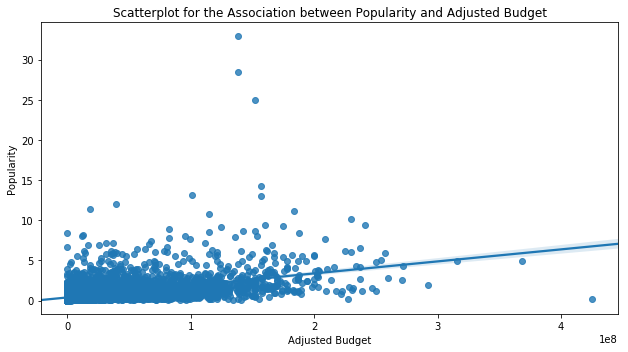

In [313]:
# plot bivariate scatterplots
fig = plt.figure(figsize=(17,5))

fig.add_subplot(121)
seaborn.regplot(x="budget_adj", y="popularity", fit_reg=True, data=sub_tmdb_df);
plt.xlabel('Adjusted Budget');
plt.ylabel('Popularity');
plt.title('Scatterplot for the Association between Popularity and Adjusted Budget');

fig.tight_layout()
plt.show()


####  Summary

<ul>
<li>Pearson correlaion value using scipy is 0.5135</li>
<li>Correlaion value using pandas is 0.51347</li>
<li>We could infer a moderate correlation between adjusted budget & popularity</li>
<li>A positive association between adjusted budget and popularity would be indicated on a scatterplot by a upward trend (positive slope)</li>      
</ul>

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 5 (What is the correlation between adjusted budget and adjusted revenue?)

#### Step 1 : Pearson correlation using scipy.stats

In [314]:
# Pearson correlation
print ('association between revenue_adj and budget_adj')
print (scipy.stats.pearsonr(sub_tmdb_df['budget_adj'], tmdb_df['revenue_adj']))

association between revenue_adj and budget_adj
(0.64657474086699418, 0.0)


#### Step 2 : Correlation using Pandas

In [315]:
# Panda's correlation
sub_tmdb_df[["revenue_adj", "budget_adj"]].corr()

,revenue_adj,budget_adj
revenue_adj,1.000000,0.646575
budget_adj,0.646575,1.000000


#### Step 3 : Plot bivariate scatterplots

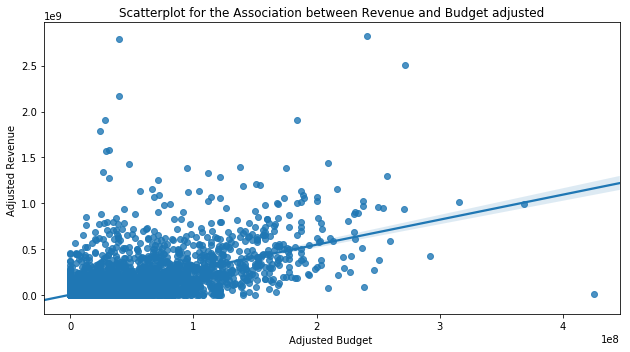

In [316]:
# plot bivariate scatterplots
fig = plt.figure(figsize=(17,5))

fig.add_subplot(121)
seaborn.regplot(x="budget_adj", y="revenue_adj", fit_reg=True, data=sub_tmdb_df);
plt.xlabel('Adjusted Budget ');
plt.ylabel('Adjusted Revenue ');
plt.title('Scatterplot for the Association between Revenue and Budget adjusted');

fig.tight_layout()
plt.show()

####  Summary

<ul>
<li>Pearson correlation value using scipy is 0.64660744106089785</li>
<li>Correlaion value using pandas is 0.646575</li>
<li>As we can see, there is a moderate association between adjusted budget and adjusted revenue</li>
<li>This was to be expected, since the scatterplot shows the same upaward trend</li> 
</ul>

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 6 (What is the correlation between runtime & popularity? )

#### Step 1 : Pearson correlation using scipy.stats

In [317]:
# Pearson correlation
print ('association between runtime and popularity')
print (scipy.stats.pearsonr(tmdb_df['runtime'], sub_tmdb_df['popularity']))

association between runtime and popularity
(0.13885859895055919, 7.154457057765261e-48)


#### Step 2 : Correlation using Pandas

In [318]:
# Panda's correlation
sub_tmdb_df[["runtime", "popularity"]].corr()

,runtime,popularity
runtime,1.000000,0.138859
popularity,0.138859,1.000000


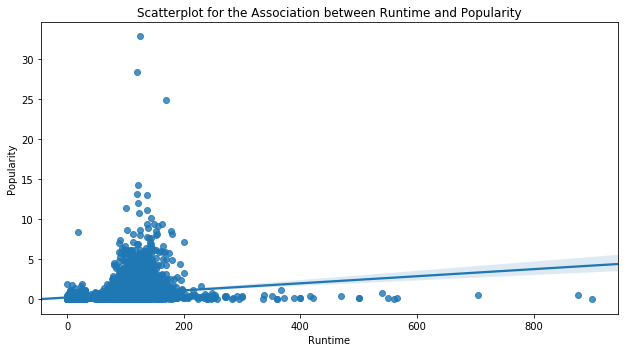

In [319]:
# plot bivariate scatterplots
fig = plt.figure(figsize=(17,5))

fig.add_subplot(121)
seaborn.regplot(x="runtime", y="popularity", fit_reg=True, data=sub_tmdb_df);
plt.xlabel('Runtime');
plt.ylabel('Popularity');
plt.title('Scatterplot for the Association between Runtime and Popularity');

fig.tight_layout()
plt.show()

####  Summary

<ul>
<li>Pearson correlation value using scipy is 0.13885859895055919</li>
<li>Correlaion value using pandas is 0.138859</li>
<li>As we can see, there is a little linear relationship between runtime and popularity</li>
<li>This was to be expected, since the scatterplot shows the same</li> 
</ul>

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 7 (Is there a correlation between release year and adjusted budget?

#### Step 1 : Pearson correlation using scipy.stats

In [320]:
# Pearson correlation
print ('association between release_year and budget_adj')
print (scipy.stats.pearsonr(tmdb_df['budget_adj'], sub_tmdb_df['release_year']))

association between release_year and budget_adj
(0.017126294667001159, 0.074380078904734831)


#### Step 2 : Correlation using Pandas

In [321]:
# Panda's correlation
sub_tmdb_df[["release_year", "budget_adj"]].corr()

,release_year,budget_adj
release_year,1.000000,0.017126
budget_adj,0.017126,1.000000


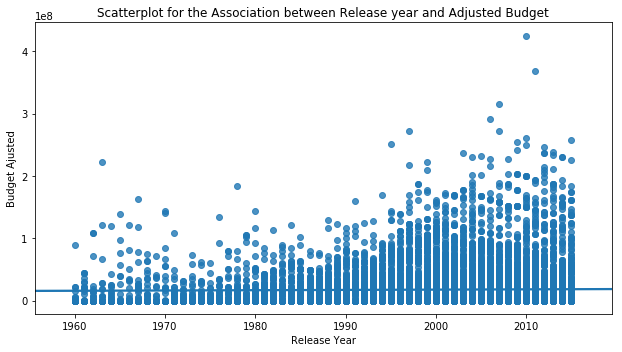

In [322]:
# plot bivariate scatterplots
fig = plt.figure(figsize=(17,5))

fig.add_subplot(121)
seaborn.regplot(x="release_year", y="budget_adj", fit_reg=True, data=sub_tmdb_df);
plt.xlabel('Release Year');
plt.ylabel('Budget Ajusted');
plt.title('Scatterplot for the Association between Release year and Adjusted Budget');

fig.tight_layout()
plt.show()

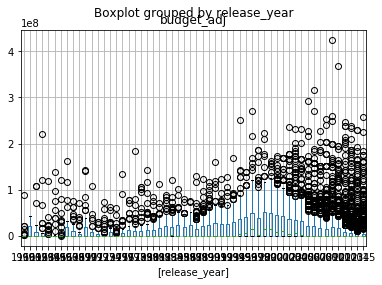

In [323]:
tmdb_df[["release_year", "budget_adj"]].boxplot(by='release_year')

####  Summary

<ul>
<li>Pearson correlation value using scipy is 0.017126294667001159</li>
<li>Correlaion value using pandas is 0.017126</li>
<li>As we can see, there seems no linear relationship between release year and adjusted budget</li>
<li>This was to be expected, since the scatterplot shows the same</li>
<li>But there could be a situation that number of movies produced have increased year on year. Ex: Movies that were prodcued in 1960 are less in number than in 2015. I wanted to check if this impacts above observation</li> 
<li>However after plotting the box plot, we see boxes at the bottom but then for every year there are many outliers too</li>
<li>Thus, there is not enough evidence of linear relationship between release year and adjusted budget based on additional scrutiny</li>
</ul>

<a id='conclusions'></a>
## Correlation Matrix

> Finally, I would like to summarize my correlation findings and the results that have been performed in the form of the below correlation martix and the heatmap.

In [324]:
# Panda's correlation
sub_tmdb_df.corr()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.138859,0.210306,0.090141,0.513470,0.609044
runtime,0.138859,1.000000,0.158340,-0.116518,0.220949,0.175570
vote_average,0.210306,0.158340,1.000000,-0.118650,0.093815,0.193709
release_year,0.090141,-0.116518,-0.118650,1.000000,0.017126,-0.066016
budget_adj,0.513470,0.220949,0.093815,0.017126,1.000000,0.646575
revenue_adj,0.609044,0.175570,0.193709,-0.066016,0.646575,1.000000


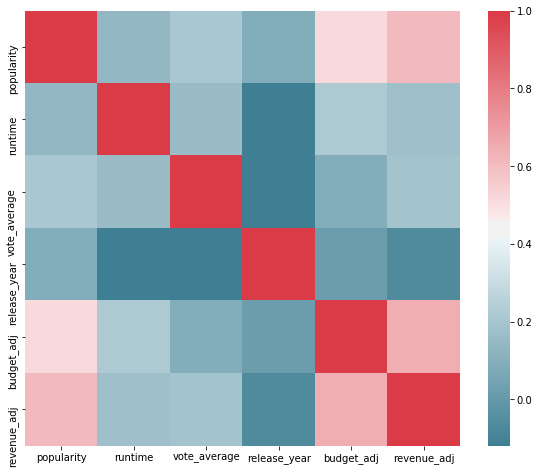

In [325]:
# Plot the heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = sub_tmdb_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<a id='conclusions'></a>
## Conclusions

> Below are some key observations of my exploration:
<ul>
<li>Avatar is the movie with highest revenue based on adjusted revenues but it was not the most popular</li>
<li>Movie titled "The Warrior's Way" is produced with highest adjusted budget but it was not the one to get highest all time revenues</li>
<li>Movie titled "Inception" got highest votes but it was not the most popular</li>
<li>Moderate correlation between (i)the adjusted budget and adjusted revenue (ii) popularity and adjusted budget (iii)Popularity and adjusted revenue</li>
<li>Little correlation between the adjusted runtime and adjusted revenue</li>
<li>No correlation between the release year and adjusted budget</li>     
</ul>
